Making Dataset

In [22]:
!pip3 install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
  import torch
  import numpy as np
  import matplotlib.pyplot as plt
  import torch.nn as nn
  from sklearn import datasets

In [24]:
n_pts = 100 # number of points
centers = [[-0.5,0.5] , [0.5,-0.5]] # centers of clusters
# creates cluster of points, random_state is the seed
#cluster_std -> standard deviation
# X points
# y labels
X, y = datasets.make_blobs(n_samples=n_pts, random_state =123, centers=centers, cluster_std=0.4)
# print(X)
# print(y) 

# We need this date in form of tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))


In [25]:
def scatter_plot():
  # scatter plot
  # prendiamo rispettivamente tutti i punti con label 0, segue quindi l'indice 0 per la componente dell'asse x, 1 per per quella y
  plt.scatter(X[y==0, 0], X[y==0, 1])
  # ripetiamo per i punti di etichetta 1
  plt.scatter(X[y==1, 0], X[y==1, 1])

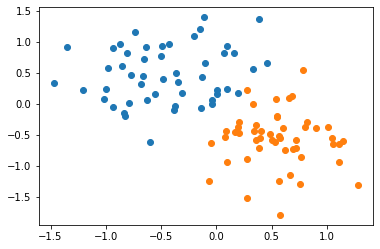

In [26]:
scatter_plot()

Perceptron Model

Cross Entropy to obtain the value of the total error

In [27]:
# extend nn.Module
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [28]:
 torch.manual_seed(2)
 model = Model(2,1)
 print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [29]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [30]:
def plot_fit(title):
  plt.title = title
  #0 = w1x1 + w2x2 + b
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  print(type(w1*x1))
  x2 = ( w1*x1 + b1 )/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

<class 'numpy.ndarray'>


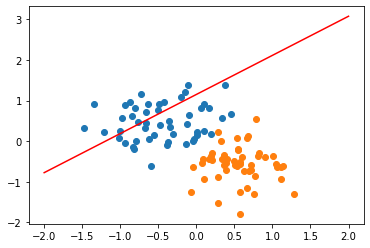

In [31]:
plot_fit('Initial Model')

Model Training

In [32]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [33]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  # print(y_pred.size())
  # print(y_data.size())
  loss = criterion(y_pred, y_data)
  print("epoch: ", i, "loss", loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0 loss 0.6185115575790405
epoch:  1 loss 0.617464005947113
epoch:  2 loss 0.6164200305938721
epoch:  3 loss 0.6153795123100281
epoch:  4 loss 0.6143423318862915
epoch:  5 loss 0.6133086681365967
epoch:  6 loss 0.612278401851654
epoch:  7 loss 0.6112514734268188
epoch:  8 loss 0.6102280020713806
epoch:  9 loss 0.6092078685760498
epoch:  10 loss 0.6081911325454712
epoch:  11 loss 0.607177734375
epoch:  12 loss 0.6061676740646362
epoch:  13 loss 0.6051609516143799
epoch:  14 loss 0.604157567024231
epoch:  15 loss 0.6031573414802551
epoch:  16 loss 0.6021605730056763
epoch:  17 loss 0.6011670231819153
epoch:  18 loss 0.6001767516136169
epoch:  19 loss 0.5991896986961365
epoch:  20 loss 0.5982059240341187
epoch:  21 loss 0.5972253680229187
epoch:  22 loss 0.5962480306625366
epoch:  23 loss 0.5952739119529724
epoch:  24 loss 0.5943029522895813
epoch:  25 loss 0.5933352112770081
epoch:  26 loss 0.5923706293106079
epoch:  27 loss 0.5914091467857361
epoch:  28 loss 0.5904508233070374
ep

Text(0.5, 0, 'epoch')

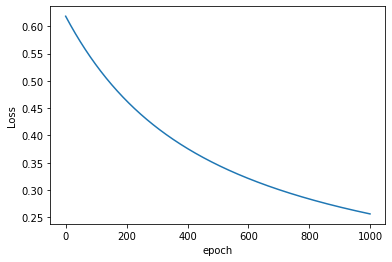

In [34]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

<class 'numpy.ndarray'>


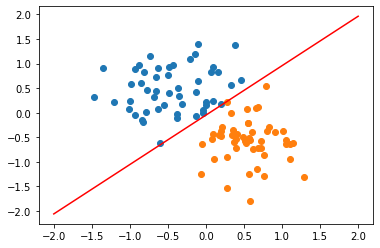

In [35]:
plot_fit("Trained Model")

Model Testing

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point in class 1
Black point in class 0
<class 'numpy.ndarray'>


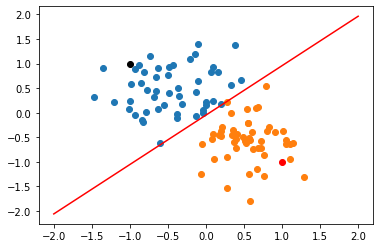

In [37]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(model.forward(point1).item() ) )
print("Black point positive probability = {}".format(model.forward(point2).item() ) )
print("Red point in class {}".format(model.predict(point1)) )
print("Black point in class {}".format(model.predict(point2)) )
plot_fit('Trained Model')